# Data Visualization

In [45]:
import pandas as pd

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

## Income statement

Link for data analysis:

https://raw.githubusercontent.com/HAZCHEM234/Apple_stock_analysis/main/apple_income_sheet.csv

In [47]:
income_df = pd.read_csv("https://raw.githubusercontent.com/HAZCHEM234/Apple_stock_analysis/main/apple_income_sheet.csv")

#### Creating line charts:

Purpose: Ideal for showing trends over time.


Usage: Plot each of the financial metrics (Total Revenue, Gross Profit, Operating Income, Net Income, and Earnings Per Share) over the years 2020 to 2023. This will help you visualize how each metric has changed over the specified period.

In [48]:
filtered_df = income_df

Text(0, 0.5, 'Total Revenue')

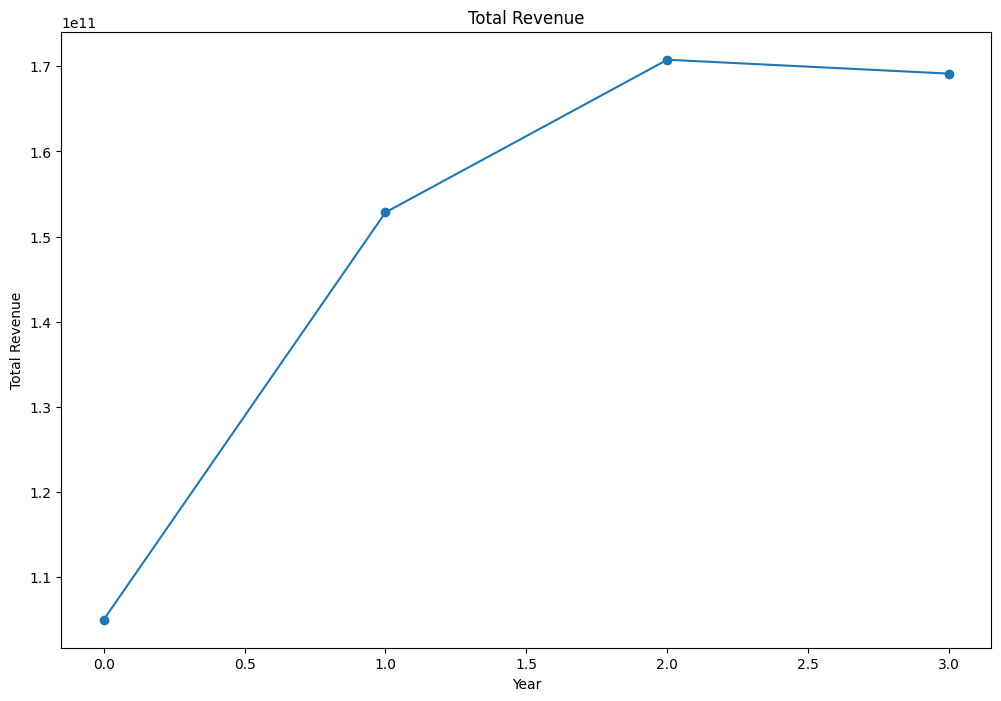

In [49]:
# Plot each financial metric
plt.figure(figsize=(12, 8))

# Plot Total Revenue
plt.plot(filtered_df.index, filtered_df['Total Revenue'], marker='o')
plt.title('Total Revenue')
plt.xlabel('Year')
plt.ylabel('Total Revenue')


#### Bar Chart:

Purpose: Good for comparing values across different years.


Usage: Create grouped bar charts where each group represents a year, and within each group, there are bars for each metric. This helps in comparing the financial metrics for each year side-by-side.

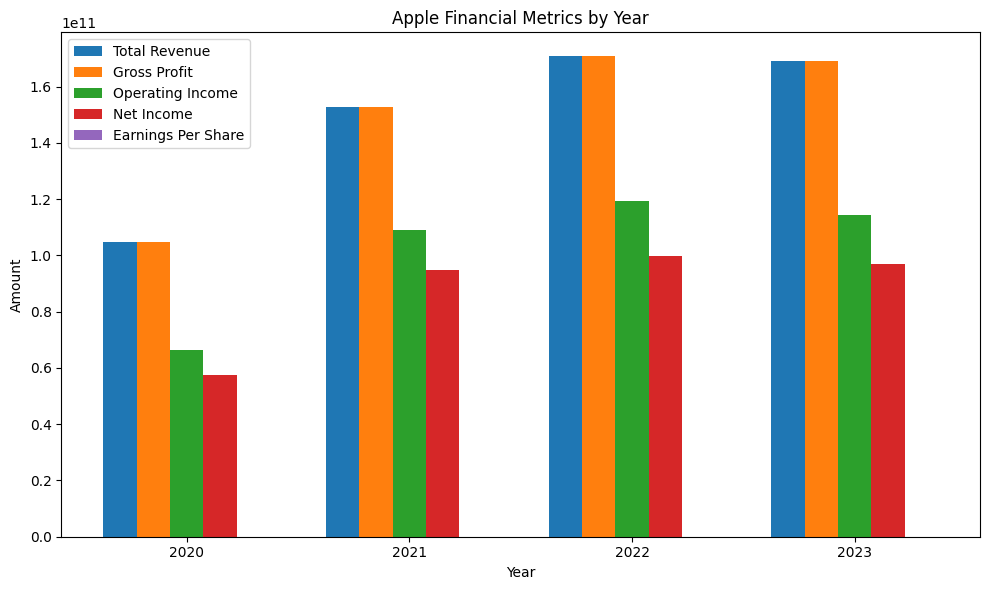

In [50]:
# Extracting necessary data for plotting
years = income_df['Date'].apply(lambda x: x[:4])  # Extracting only the year part from the Date column
revenue = income_df['Total Revenue']
gross_profit = income_df['Gross Profit']
operating_income = income_df['Operating Income']
net_income = income_df['Net Income']
earnings_per_share = income_df['Earnings Per Share']

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))

bar_width = 0.15
index = range(len(years))

plt.bar(index, revenue, bar_width, label='Total Revenue')
plt.bar([i + bar_width for i in index], gross_profit, bar_width, label='Gross Profit')
plt.bar([i + 2 * bar_width for i in index], operating_income, bar_width, label='Operating Income')
plt.bar([i + 3 * bar_width for i in index], net_income, bar_width, label='Net Income')
plt.bar([i + 4 * bar_width for i in index], earnings_per_share, bar_width, label='Earnings Per Share')

plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Apple Financial Metrics by Year')
plt.xticks([i + 2 * bar_width for i in index], years)
plt.legend()

plt.tight_layout()
plt.show()

#### Area Chart:

Purpose: Similar to a line chart but emphasizes the volume of data.


Usage: Use an area chart to show trends over time for Total Revenue, Gross Profit, Operating Income, Net Income, and Earnings Per Share, highlighting the magnitude of changes.

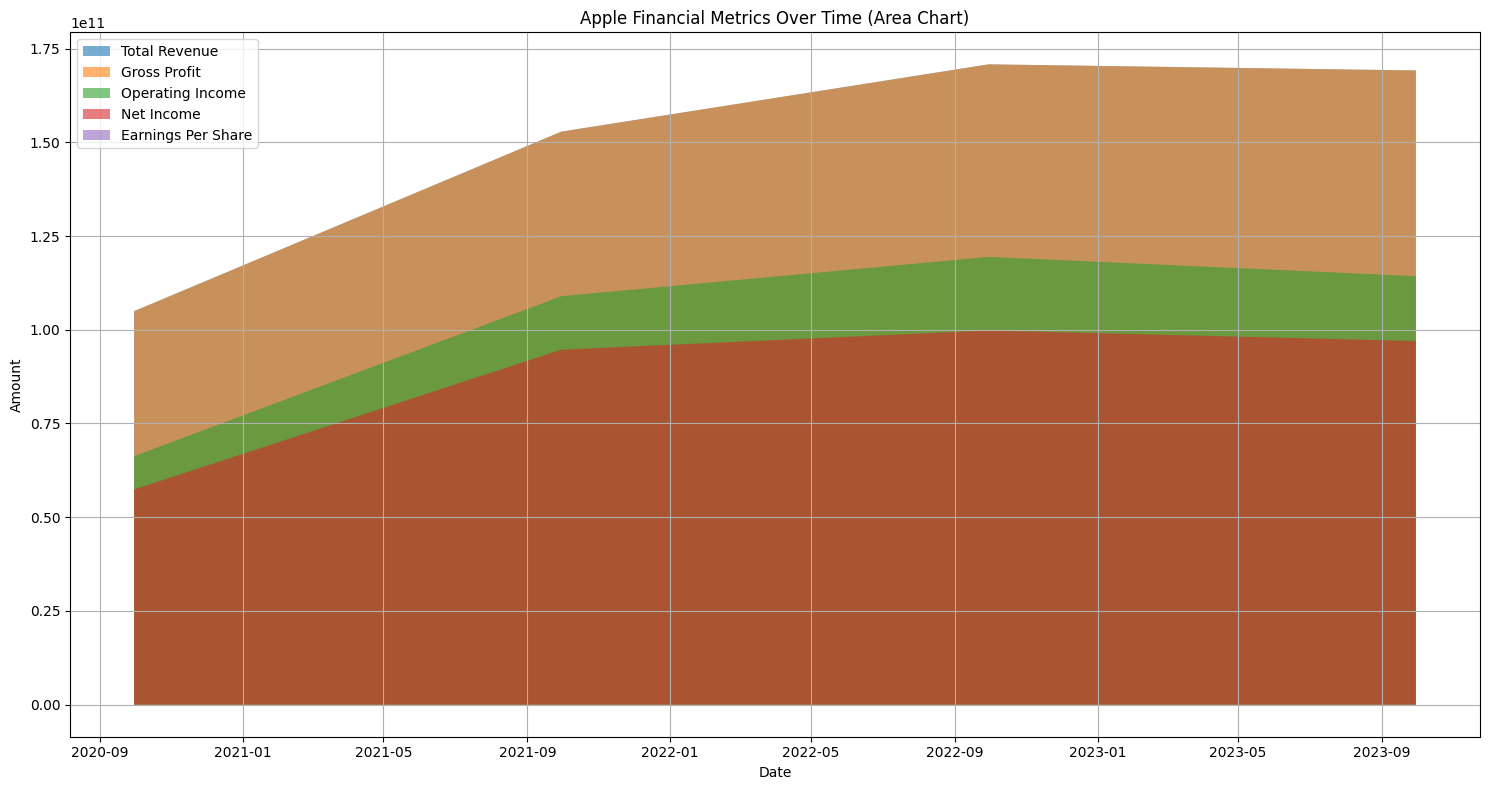

In [76]:
dates = pd.to_datetime(income_df['Date'])  # Convert Date column to datetime for proper plotting
revenue = income_df['Total Revenue']
gross_profit = income_df['Gross Profit']
operating_income = income_df['Operating Income']
net_income = income_df['Net Income']
earnings_per_share = income_df['Earnings Per Share']

# Plotting the area chart
plt.figure(figsize=(15, 8))

plt.fill_between(dates, revenue, alpha=0.6, label='Total Revenue')
plt.fill_between(dates, gross_profit, alpha=0.6, label='Gross Profit')
plt.fill_between(dates, operating_income, alpha=0.6, label='Operating Income')
plt.fill_between(dates, net_income, alpha=0.6, label='Net Income')
plt.fill_between(dates, earnings_per_share, alpha=0.6, label='Earnings Per Share')

plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Apple Financial Metrics Over Time (Area Chart)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Balance sheet

link: 
https://raw.githubusercontent.com/HAZCHEM234/Apple_stock_analysis/main/apple_balance_sheet.csv

#### Stacked Bar Chart:

Purpose: Allows for easy comparison of total values and their components across different time periods.

Usage: Create a stacked bar chart where each bar represents a different year, divided into segments for Total Assets, Current Assets, Non-Current Assets, Current Liabilities, Non-Current Liabilities, and Common Stock Equity. This chart type makes it straightforward to compare the total size of each category and their composition over time.


In [52]:
balance_sheet_df = pd.read_csv("https://raw.githubusercontent.com/HAZCHEM234/Apple_stock_analysis/main/apple_balance_sheet.csv")

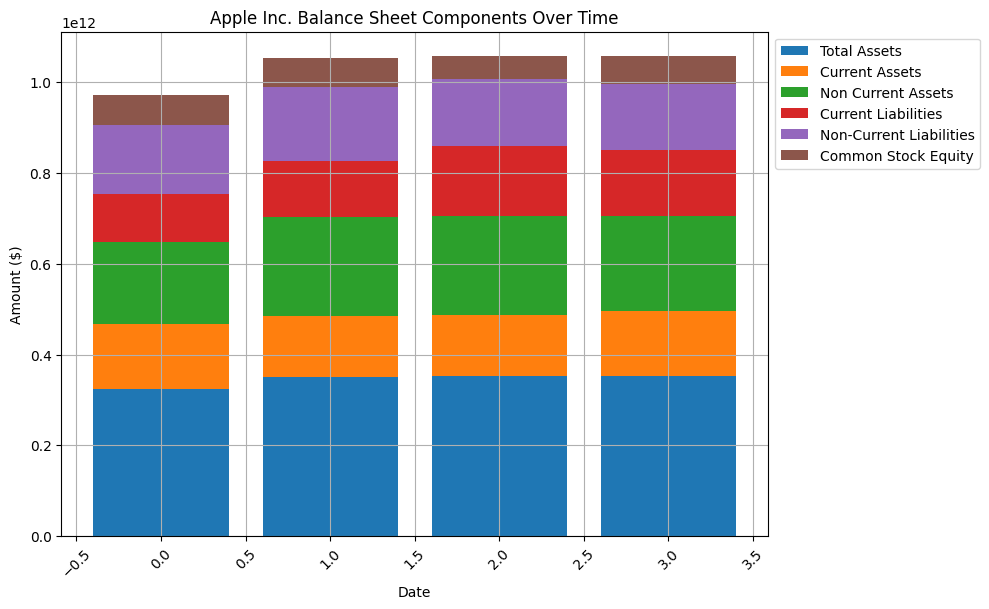

In [53]:
# Define the categories and their order for stacking
categories = ['Total Assets', 'Current Assets', 'Non Current Assets', 
              'Current Liabilities', 'Non-Current Liabilities', 'Common Stock Equity']

# Prepare data for plotting
plot_data = balance_sheet_df[categories]

# Plotting stacked bar chart
plt.figure(figsize=(10, 6))

# Calculate the bottom positions for each category to achieve stacking
bottom = None
for category in categories:
    if bottom is None:
        plt.bar(balance_sheet_df.index, plot_data[category], label=category)
        bottom = plot_data[category]
    else:
        plt.bar(balance_sheet_df.index, plot_data[category], bottom=bottom, label=category)
        bottom += plot_data[category]

plt.title('Apple Inc. Balance Sheet Components Over Time')
plt.xlabel('Date')
plt.ylabel('Amount ($)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Stacked Area Chart:

Purpose: Shows the trend and composition of each component over time.

Usage: Use a stacked area chart to visualize how Total Assets, Current Assets, Non-Current Assets, Current Liabilities, Non-Current Liabilities, and Common Stock Equity change over the years. Each component (Assets and Liabilities) would be represented by a different color, stacked upon each other to show the total value.

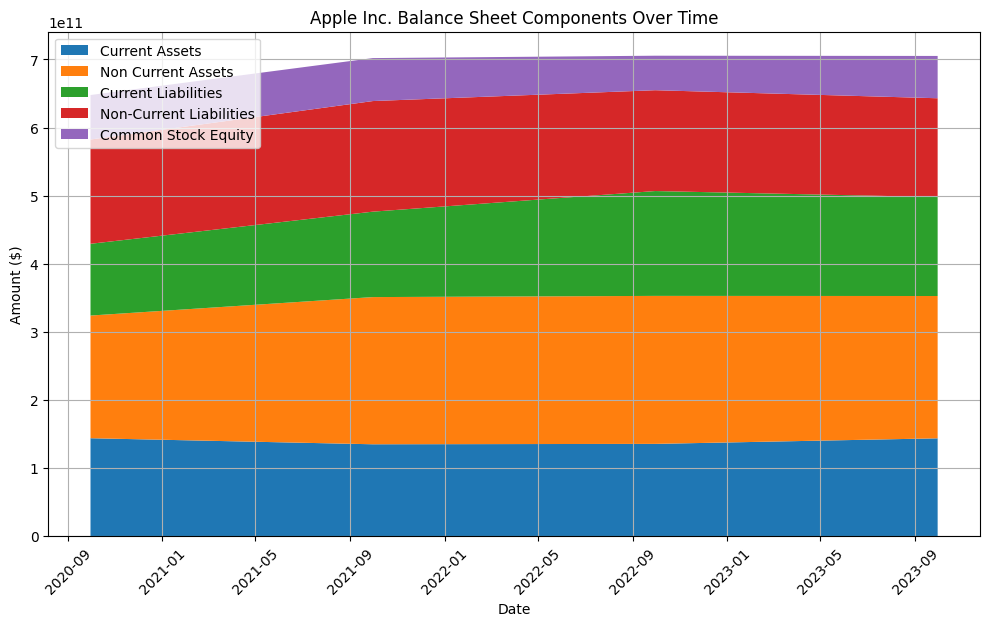

In [54]:
# Convert 'Date' column to datetime format
balance_sheet_df['Date'] = pd.to_datetime(balance_sheet_df['Date'])

# Set 'Date' column as the index
balance_sheet_df.set_index('Date', inplace=True)

# Extract relevant columns for plotting
columns_to_plot = ['Current Assets', 'Non Current Assets', 'Current Liabilities', 'Non-Current Liabilities', 'Common Stock Equity']
plot_data = balance_sheet_df[columns_to_plot]

# Plotting stacked area chart
plt.figure(figsize=(10, 6))
plt.stackplot(balance_sheet_df.index, plot_data.values.T, labels=columns_to_plot)
plt.title('Apple Inc. Balance Sheet Components Over Time')
plt.xlabel('Date')
plt.ylabel('Amount ($)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Cashflow 

link:
 
https://raw.githubusercontent.com/HAZCHEM234/Apple_stock_analysis/main/apple_cashflow_sheet.csv

In [79]:
cashflow_link = "https://raw.githubusercontent.com/HAZCHEM234/Apple_stock_analysis/main/apple_cashflow_sheet.csv"

cashflow_df = pd.read_csv(cashflow_link)


#### Stacked area charts

Purpose: Shows the trend and composition of cash flows over time.

Usage: Visualize how Operating Cash Flow, Investing Cash Flow, Financing Cash Flow, Free Cash Flow, and Capital Expenditure change over the years. Each component would be represented by a different color, stacked upon each other to show the total value

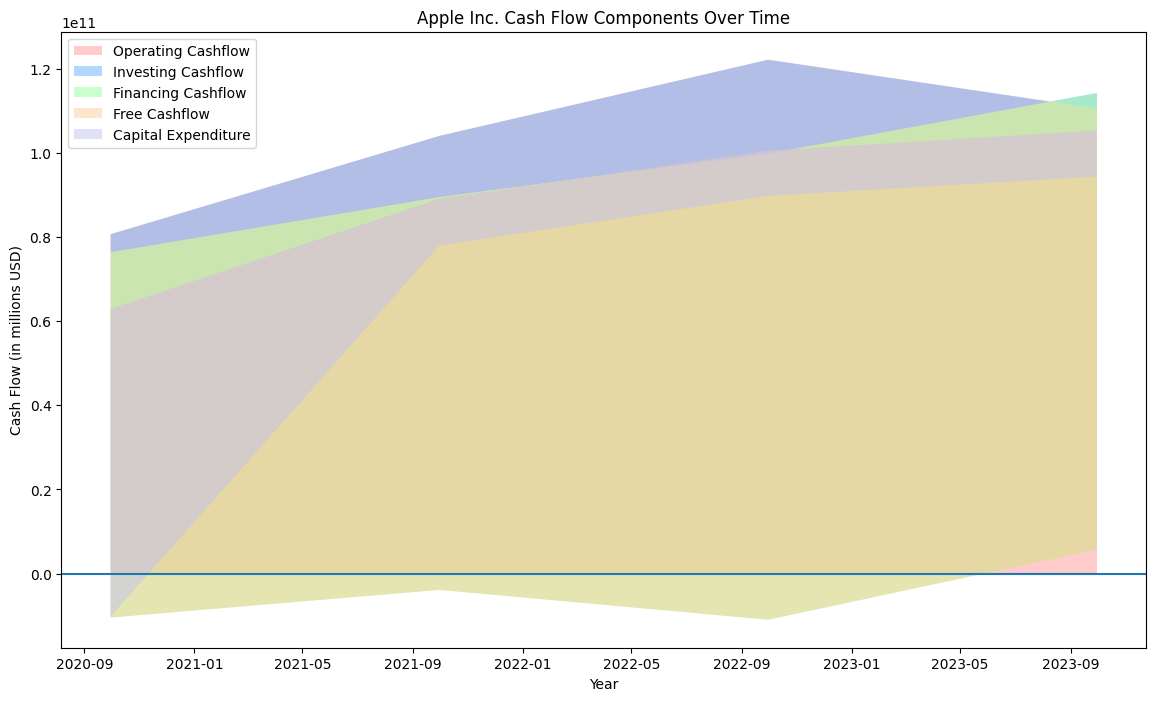

In [80]:
# Convert the 'Date' column to datetime
cashflow_df['Date'] = pd.to_datetime(cashflow_df['Date'])

# Set 'Date' as the index
cashflow_df.set_index('Date', inplace=True)

# Plot the stacked area chart
plt.figure(figsize=(14, 8))
plt.stackplot(cashflow_df.index,
              cashflow_df['Operating Cashflow'],
              cashflow_df['Investing Cashflow'],
              cashflow_df['Financing Cashflow'],
              cashflow_df['Free Cashflow'],
              cashflow_df['Capital Expenditure'],
              labels=['Operating Cashflow', 'Investing Cashflow', 'Financing Cashflow', 'Free Cashflow', 'Capital Expenditure'],
              colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'],
              alpha=0.5)
plt.legend(loc='upper left')
plt.title('Apple Inc. Cash Flow Components Over Time')
plt.axhline()
plt.xlabel('Year')
plt.ylabel('Cash Flow (in millions USD)')
plt.show()





#### Line Chart:

Purpose: Ideal for showing trends over time for individual cash flow components.

Usage: Plot each cash flow component (Operating Cash Flow, Investing Cash Flow, Financing Cash Flow, Free Cash Flow, and Capital Expenditure) as a separate line over the years. This highlights the changes in each component over time.

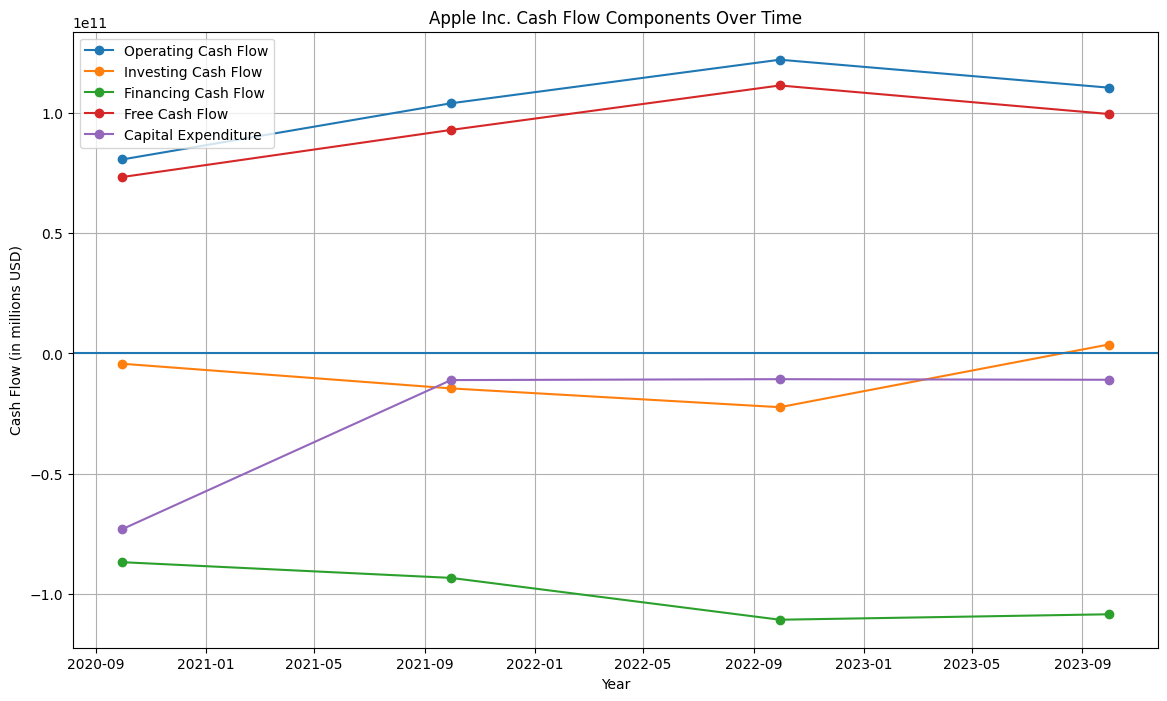

In [77]:
# Plot the line chart
plt.figure(figsize=(14, 8))

# Plot each cash flow component
plt.plot(cashflow_df.index, cashflow_df['Operating Cashflow'], label='Operating Cash Flow', marker='o')
plt.plot(cashflow_df.index, cashflow_df['Investing Cashflow'], label='Investing Cash Flow', marker='o')
plt.plot(cashflow_df.index, cashflow_df['Financing Cashflow'], label='Financing Cash Flow', marker='o')
plt.plot(cashflow_df.index, cashflow_df['Free Cashflow'], label='Free Cash Flow', marker='o')
plt.plot(cashflow_df.index, cashflow_df['Capital Expenditure'], label='Capital Expenditure', marker='o')

# Add titles and labels
plt.title('Apple Inc. Cash Flow Components Over Time')
plt.xlabel('Year')
plt.ylabel('Cash Flow (in millions USD)')
plt.legend(loc='upper left')

# Show plot
plt.axhline()
plt.grid(True)
plt.show()





#### Stacked Bar Chart:

Purpose: Allows for easy comparison of total values and their components across different time periods.


Usage: Create a stacked bar chart where each bar represents a different year, divided into segments for each cash

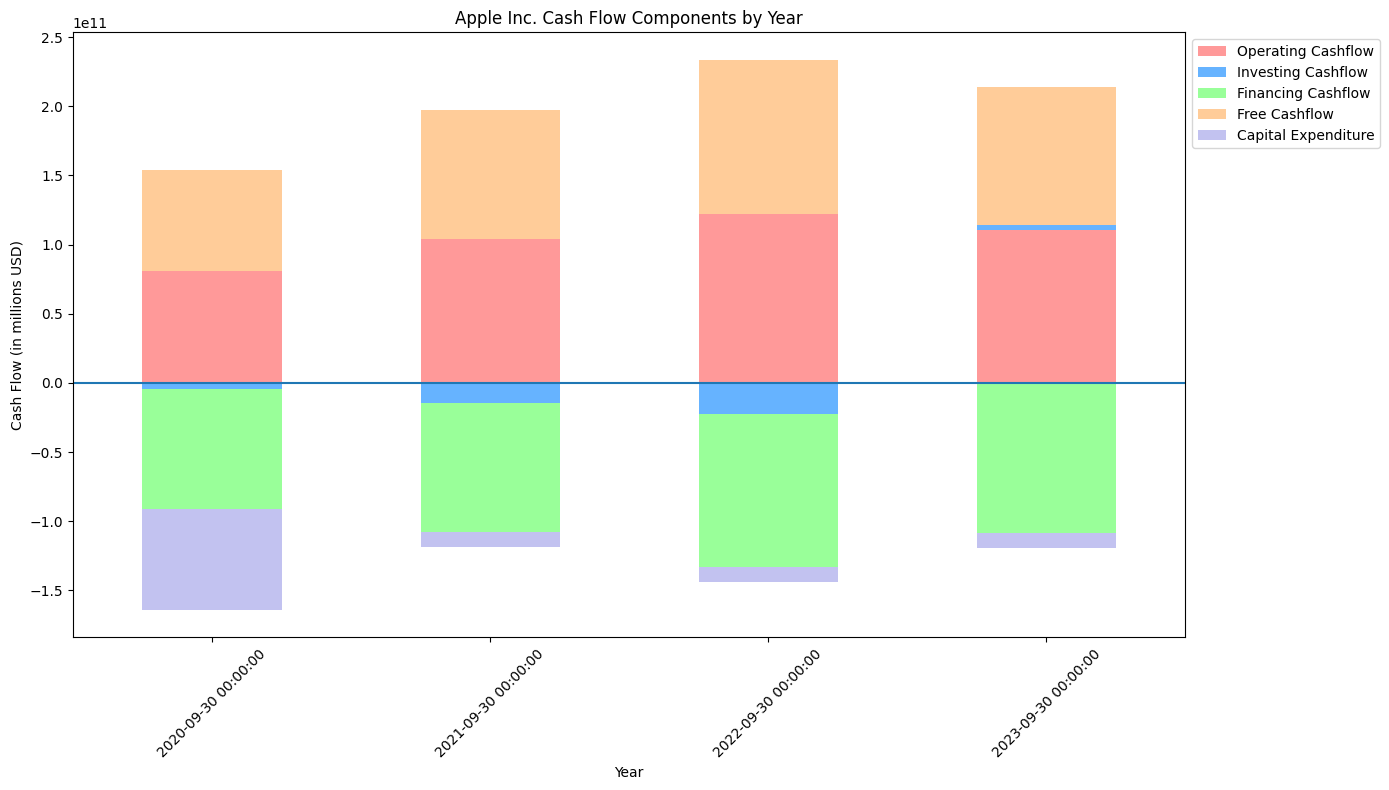

In [75]:
# Plot the stacked bar chart
cashflow_df[['Operating Cashflow', 'Investing Cashflow', 'Financing Cashflow', 'Free Cashflow', 'Capital Expenditure']].plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
)

# Add titles and labels
plt.title('Apple Inc. Cash Flow Components by Year')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Cash Flow (in millions USD)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.axhline()
plt.tight_layout()
plt.show()